In [1]:
import cv2 as cv
import numpy as np
import opencv_jupyter_ui as jcv2  # pip install opencv_jupyter_ui
import matplotlib.pyplot as plt

Изображение 1

In [2]:
def warpImages(img1, img2, H):
  rows1, cols1 = img1.shape[:2]
  rows2, cols2 = img2.shape[:2]

  list_of_points_1 = np.float32([[0,0], [0, rows1],[cols1, rows1], [cols1, 0]]).reshape(-1, 1, 2)
  temp_points = np.float32([[0,0], [0,rows2], [cols2,rows2], [cols2,0]]).reshape(-1,1,2)

  # When we have established a homography we need to warp perspective
  # Change field of view
  list_of_points_2 = cv.perspectiveTransform(temp_points, H)

  list_of_points = np.concatenate((list_of_points_1, list_of_points_2), axis=0)

  [x_min, y_min] = np.int32(list_of_points.min(axis=0).ravel() - 0.5)
  [x_max, y_max] = np.int32(list_of_points.max(axis=0).ravel() + 0.5)

  translation_dist = [-x_min, -y_min]

  H_translation = np.array([[1, 0, translation_dist[0]], [0, 1, translation_dist[1]], [0, 0, 1]])

  output_img = cv.warpPerspective( img2, H_translation.dot(H), (x_max-x_min, y_max-y_min) )
  output_img[translation_dist[1]:rows1+translation_dist[1], translation_dist[0]:cols1+translation_dist[0]] = img1

  return output_img

In [3]:
def make_panoram(img1, img2, ransacThershold, nfeatures=2000, min_match=10):

    orb = cv.ORB_create(nfeatures)
    keypoints1, descriptors1 = orb.detectAndCompute(img1, None)
    keypoints2, descriptors2 = orb.detectAndCompute(img2, None)

    bf = cv.BFMatcher_create(cv.NORM_HAMMING)

    matches = bf.knnMatch(descriptors1, descriptors2, k=2)
    all_matches = []
    for m, n in matches:
        all_matches.append(m)

    good = []
    for m, n in matches:
        if m.distance < 0.6 * n.distance:
            good.append(m)
    if len(good) > min_match: # Set minimum match condition
        # Convert keypoints to an argument for findHomography
        src_pts = np.float32([ keypoints1[m.queryIdx].pt for m in good]).reshape(-1,1,2)
        dst_pts = np.float32([ keypoints2[m.trainIdx].pt for m in good]).reshape(-1,1,2)

        # Вычисление матрицы гомографии
        M, _ = cv.findHomography(src_pts, dst_pts, cv.RANSAC, ransacThershold)

        return  warpImages(img2, img1, M)
    else:
        return 0

In [4]:
images = []
for i in range(1, 6):
    images.append(cv.imread(f"task_3_images/building1/building{i}.jpg"))

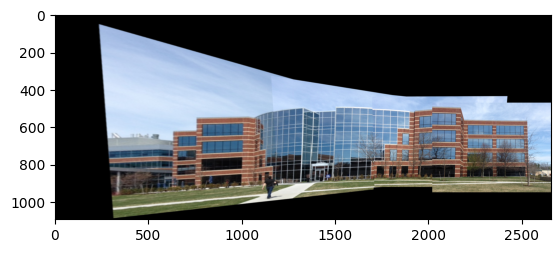

In [5]:
last_image = images[0]
for i in range(1,5):
    current_img = images[i].copy()
    last_image = make_panoram(last_image, current_img, 1)
# jcv2.imshow("res", last_image)
plt.imshow(cv.cvtColor(last_image, cv.COLOR_BGR2RGB))


In [6]:
def cut_hight(img, width_cor=0):
    res = img.copy()
    fnb = 0
    for i in range(res.shape[0]):
        if sum(res[i, width_cor, :]) > 0:
            fnb = i
            break
    fb = res.shape[0]
    for i in range(fnb, res.shape[0]):
        if sum(res[i, width_cor, :]) == 0:
            fb = i
            break
    res = res[fnb:fb, :, :]
    return res

def cut_right(img, height_cor=0):
    res = img.copy()
    fb = 0
    for i in range(0, res.shape[1]):
        if sum(res[height_cor, i, :]) == 0:
            fb = i
            break
    res = res[:, :fb, :]
    return res

def cut_left(img, height_cor=0):
    res = img.copy()
    fnb = 0
    for i in range(0, res.shape[1]):
        if sum(res[height_cor, i, :]) > 0:
            fnb = i
            break
    res = res[:, fnb:, :]
    return res


Изображение 2

In [7]:
images = []
for i in range(7, 10):
    images.append(cv.imread(f"task_3_images/building2/dsc_270{i}.jpg"))
for i in range(10, 12):
    images.append(cv.imread(f"task_3_images/building2/dsc_27{i}.jpg"))

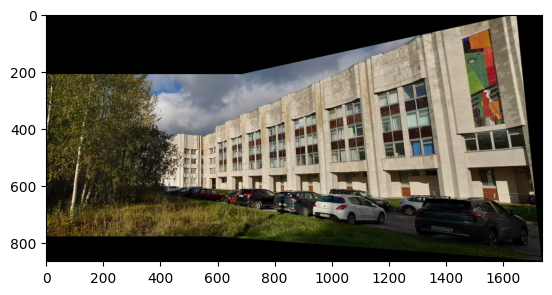

In [8]:
image1 = images[-1]
image2 = images[-2]
res = make_panoram(image2, image1, 10)
plt.imshow(cv.cvtColor(res, cv.COLOR_BGR2RGB))

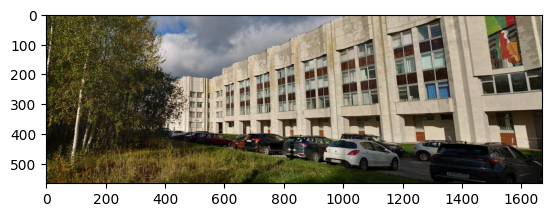

In [9]:
cuted_res = cut_hight(res)
cuted_res = cut_right(cuted_res)
plt.imshow(cv.cvtColor(cuted_res, cv.COLOR_BGR2RGB))


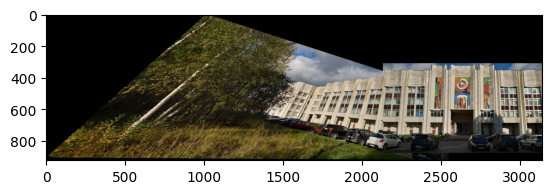

In [10]:
image3 = images[-3]
res2 = make_panoram(cuted_res, image3, 0.1)
plt.imshow(cv.cvtColor(res2, cv.COLOR_BGR2RGB))

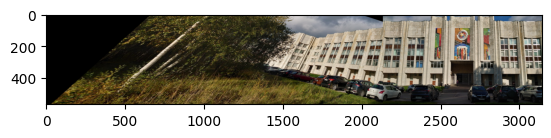

In [11]:
cuted_res2 = cut_hight(res2, 3000)
# cuted_res2 = cut_right(cuted_res2)
plt.imshow(cv.cvtColor(cuted_res2, cv.COLOR_BGR2RGB))

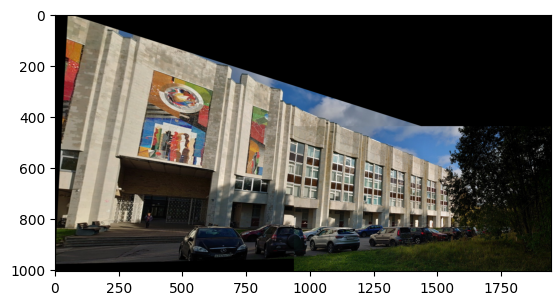

In [12]:
img4 = images[1]
img5 = images[0]
res3 = make_panoram(img4, img5, 1)
plt.imshow(cv.cvtColor(res3, cv.COLOR_BGR2RGB))

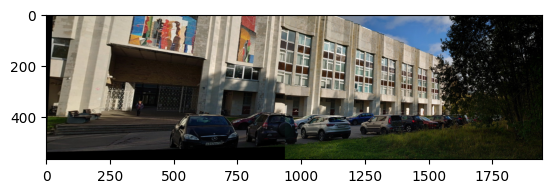

In [13]:
cuted_res3 = cut_hight(res3, 1500)
plt.imshow(cv.cvtColor(cuted_res3, cv.COLOR_BGR2RGB))

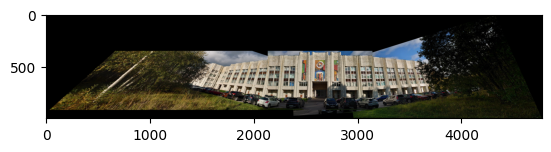

In [14]:
result = make_panoram(cuted_res3, cuted_res2, 0.1)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))


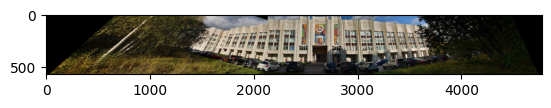

In [15]:
cuted_result = cut_hight(result, 1000)
plt.imshow(cv.cvtColor(cuted_result, cv.COLOR_BGR2RGB))

Изображение 3

In [16]:
images = []
for i in range(1, 8):
    images.append(cv.imread(f"task_3_images/building3/dsc_272{i}.jpg"))

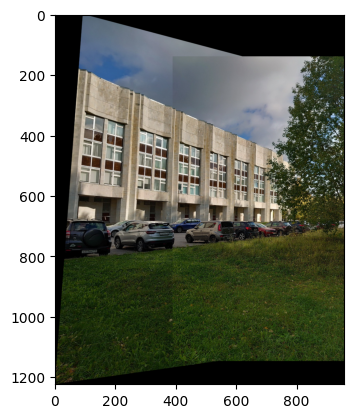

In [17]:
img1 = images[0]
img2 = images[1]
res1 = make_panoram(img2, img1, 1)
plt.imshow(cv.cvtColor(res1, cv.COLOR_BGR2RGB))

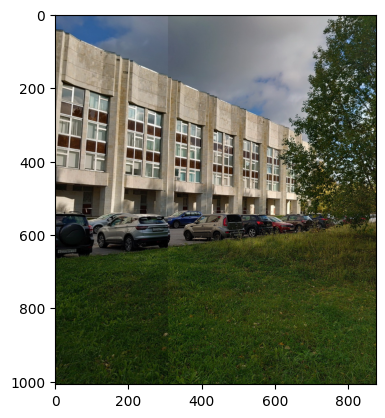

In [18]:
cuted_res1 = cut_hight(res1, 800)
cuted_res1 = cut_left(cuted_res1)
plt.imshow(cv.cvtColor(cuted_res1, cv.COLOR_BGR2RGB))

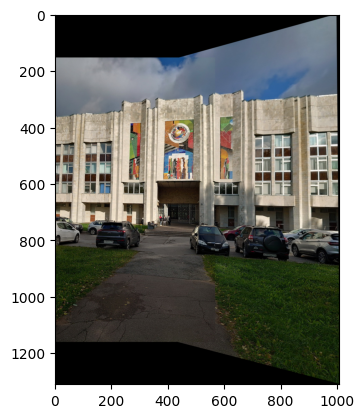

In [19]:
img3 = images[2]
img4 = images[3]
res2 = make_panoram(img3, img4, 1)
plt.imshow(cv.cvtColor(res2, cv.COLOR_BGR2RGB))

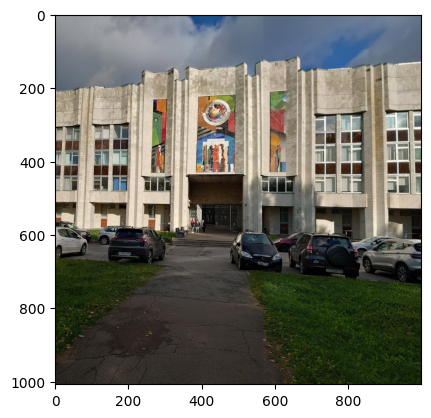

In [20]:
cuted_res2 = cut_hight(res2)
cuted_res2 = cut_right(cuted_res2)
plt.imshow(cv.cvtColor(cuted_res2, cv.COLOR_BGR2RGB))

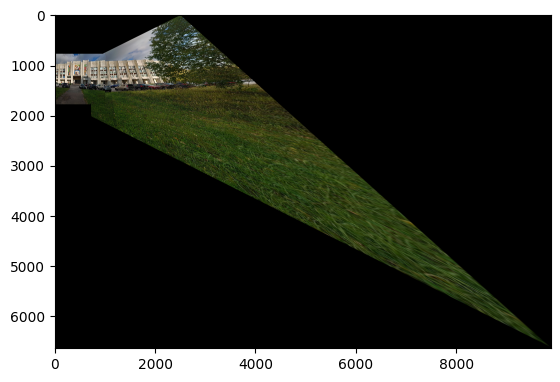

In [21]:
res3 = make_panoram(cuted_res1, cuted_res2, 0.00001)
plt.imshow(cv.cvtColor(res3, cv.COLOR_BGR2RGB))

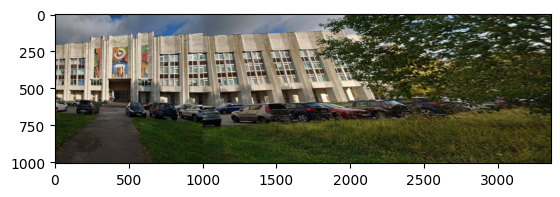

In [22]:
cuted_res3 = cut_hight(res3)
cuted_res3 = cut_right(cuted_res3)
plt.imshow(cv.cvtColor(cuted_res3, cv.COLOR_BGR2RGB))

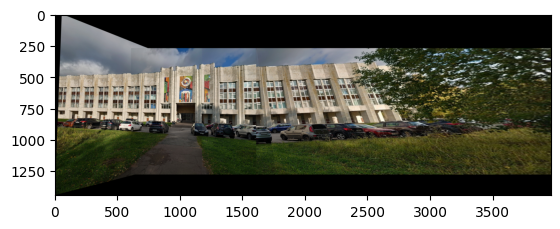

In [23]:
image5 = images[4]
res4 = make_panoram(image5, cuted_res3, 1)
plt.imshow(cv.cvtColor(res4, cv.COLOR_BGR2RGB))

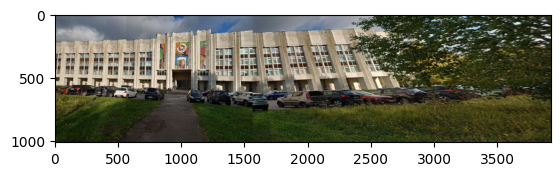

In [24]:
cuted_res4 = cut_hight(res4, 1000)
cuted_res4 = cut_left(cuted_res4)
plt.imshow(cv.cvtColor(cuted_res4, cv.COLOR_BGR2RGB))

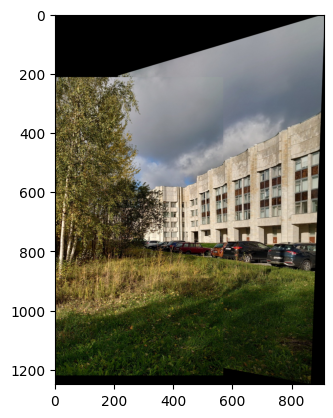

In [25]:
image6 = images[5]
image7 = images[6]
res5 = make_panoram(image6, image7, 1)
plt.imshow(cv.cvtColor(res5, cv.COLOR_BGR2RGB))

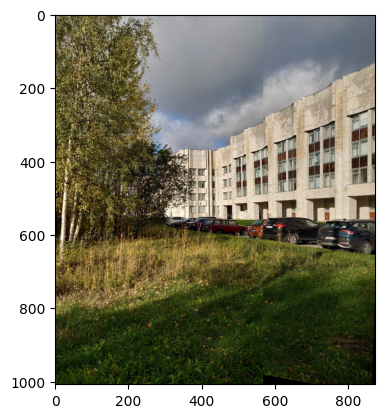

In [26]:
cuted_res5 = cut_hight(res5)
cuted_res5 = cut_right(cuted_res5, 800)
plt.imshow(cv.cvtColor(cuted_res5, cv.COLOR_BGR2RGB))

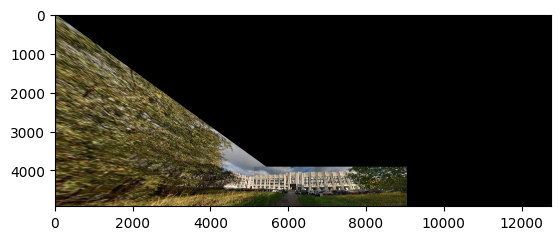

In [42]:
result = make_panoram(cuted_res5, cuted_res4, 0.6)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))

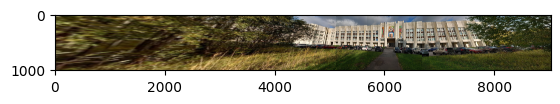

In [44]:
cuted_result = cut_hight(result, 6000)
cuted_result = cut_right(cuted_result)
plt.imshow(cv.cvtColor(cuted_result, cv.COLOR_BGR2RGB))